In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Midterm 2 Study Guide

This midterm will be cumulative, meaning that you should refresh your memory from the first midterm.  You might look at those notebooks, the study guide, your previous exam, and discuss with classmates.  The new material for this midterm includes

* Interpolation
  * Lagrange interpolating polynomial
  * Linear algebraic formulation (Vandermonde matrix)
    * Monomials
    * Chebyshev polynomials
    * Newton polynomials
  * Piecewise constant/linear/polynomial interpolation
  * Cubic splines
  * How expensive is each method in terms of number of points $n$
  * How expensive is it to incrementally update an approximation given new data?
  * How accurate are the methods 
  * What sort of artifacts might exist when interpolating:
    * a function with discontinuous values or derivatives (like $|x|$)
    * using high degree polynomials
  * What does it mean for the Vandermonde matrix to be ill conditioned?
  * How does choice of basis (monomial, Chebyshev) and choice of points (`linspace`, `cosspace`) affect:
    * conditioning of the Vandermonde matrix?
    * conditioning of the map from input points (where function values are known) to target points (where interpolant values are desired)?
    * stability of the interpolation algorithm?
* Regression
  * How is the linear algebra different to perform regression versus interpolation using the same functional representation (e.g., Chebyshev polynomials)?
  * Under what conditions can a regression problem be solved using linear algebra?
  * How expensive is such a method in terms of the number of observations $n$ and number of basis functions $k$?
  * Give an example of a loss function.
  * Give an example of a nonlinear model $f(x, c)$.
  * Compute the gradient of a nonlinear model $f(x, c)$ with respect to the coefficients $c$.
  * What is the bias-variance tradeoff?
* Numerical optimization
  * What is the "learning rate" in gradient descent?
    * What happens if it's too large?
    * What happens if it's too small?
  * Describe two methods for computing a gradient.
  * Newton and Gauss-Newton methods
    * What are the computational costs?  Compare to the costs of gradient descent.
  * What are some ways that nonlinear optimzers can fail?
* Differentiation
  * What are two sources of error in finite difference approximations of derivatives?
    * Which dominates if $h>0$ is too small?
    * Which dominates if $h>0$ is too large?
  * How many function evaluations are needed to compute a gradient?
* Asymptotic extrapolation
  * Suppose we have an algorithm that computes $f(h)$ where $h > 0$ is a parameter inversely related to cost. If we believe the error $e(h)$ is proportional to $h^2$, use two approximations $f(h_0)$ and $f(h_1)$ to estimate $f(h)$.  How accurate is your estimate?
  * Describe a plot that could be used to determine $p$.

## Accuracy for numerical differentiation

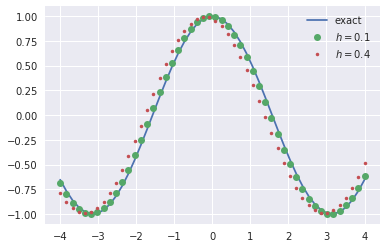

In [2]:
def diff(f, x, h):
    return (f(x + h) - f(x)) / h

x = np.linspace(-4, 4)
plt.plot(x, np.cos(x), label='exact')
plt.plot(x, diff(np.sin, x, h=.1), 'o', label='$h=0.1$')
plt.plot(x, diff(np.sin, x, h=.4), '.', label='$h=0.4$')
plt.legend();

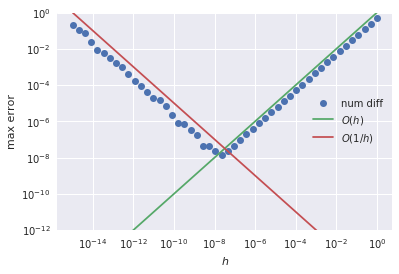

In [3]:
def compute_errors(diff, f, fp, x=np.linspace(-4, 4)):
    hs = np.geomspace(1e-15, 1)
    errors = [np.linalg.norm(diff(f, x, h) - fp(x), np.inf) for h in hs]
    return hs, errors

hs, errors = compute_errors(diff, np.sin, np.cos)
plt.loglog(hs, errors, 'o', label='num diff')
plt.loglog(hs, hs, label='$O(h)$')
plt.loglog(hs, 1e-15/hs, label='$O(1/h)$')
plt.xlabel('$h$')
plt.ylabel('max error')
plt.ylim(1e-12, 1)
plt.legend();

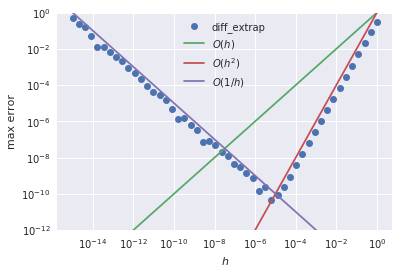

In [4]:
def diff_extrap(f, x, h):
    d1 = diff(f, x, h)
    d2 = diff(f, x, 2*h)
    return 2*d1 - d2

hs, errors_extrap = compute_errors(diff_extrap, np.sin, np.cos)
plt.loglog(hs, errors_extrap, 'o', label='diff_extrap')
plt.loglog(hs, hs, label='$O(h)$')
plt.loglog(hs, hs**2, label='$O(h^2)$')
plt.loglog(hs, 1e-15/hs, label='$O(1/h)$')
plt.xlabel('$h$')
plt.ylabel('max error')
plt.ylim(1e-12, 1)
plt.legend();

In [5]:
def diff_extrap_again(f, x, h):
    d1 = diff(f, x, h)
    d2 = diff(f, x, 2*h)
    d4 = diff(f, x, 4*h)
    # Use extrapolation again to build an estimate
    # that is even more accurate than diff_extrap.
    # Plot the results below.